In [10]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import skimage.measure
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [53]:
#for images
image = pd.concat([pd.read_csv('DroneData/SP Cup 2020/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-12/_slash_pylon_camera_node_slash_image_raw.csv'),
                                         pd.read_csv('DroneData/SP Cup 2020/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-49/_slash_pylon_camera_node_slash_image_raw.csv'),
                                          pd.read_csv('DroneData/SP Cup 2020/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-33-26/_slash_pylon_camera_node_slash_image_raw.csv'),
                                          pd.read_csv('DroneData/SP Cup 2020/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-08/_slash_pylon_camera_node_slash_image_raw.csv'),
                                          pd.read_csv('DroneData/SP Cup 2020/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-43/_slash_pylon_camera_node_slash_image_raw.csv')],ignore_index=True)

#image = pd.read_csv('./DroneData/SP Cup 2020/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-37-25/_slash_pylon_camera_node_slash_image_raw.csv')
#image = pd.read_csv('DroneData/SP Cup 2020/02_Initial data set for abnormalities training_2 Dec 2019/IMU_camera_Initial data set for abnormalities training_2 Dec 2019/_slash_pylon_camera_node_slash_image_raw.csv')

In [54]:
#function definitions
def extract_image(image):
    """
    extracts image data from the unprocessed raw image dataframe
    """
    preimg = image.split(', ')
    preimg[0] = preimg[0].replace('[','')
    preimg[-1] = preimg[-1].replace(']','')
    img  = [int(i) for i in preimg]
    return np.array(img).reshape(1536,2048)



def preprocess_image(image1, image2, kernal_func, kernal_size):
    """
    find difference of current and preceeding frame, pool according to 
    kernal function and the kernel size, return the processed image
    """
    a = cv2.cvtColor(np.uint8(extract_image(image1)),cv2.COLOR_BayerBG2GRAY)
    b = cv2.cvtColor(np.uint8(extract_image(image2)),cv2.COLOR_BayerBG2GRAY)
    dif = cv2.absdiff(skimage.measure.block_reduce(a, kernal_size, kernal_func),
                      skimage.measure.block_reduce(b, kernal_size, kernal_func))          
    return dif

def updateim(*args): 
    """
    update frame variant2: for difference between two bayer compressed images
    """
    global frameb
    
    rgbImage = preprocess_image(image['data'][frameb-1],image['data'][frameb],np.max , (20,20))
    im.set_array(rgbImage)
    avg = np.average(rgbImage)
    ax1.title.set_text('delta score: '+str(int(100*avg)/100.0))
    frameb+= 1
    return im,

def update(*args):  
    """
    update frame variant1: for default bayer compressed image
    """
    global framea
    ax2.title.set_text('Image '+str(framea-1))
    imo.set_array(cv2.cvtColor(np.uint8(extract_image(image['data'][framea-1])), cv2.COLOR_BayerBG2RGB))
    ax3.title.set_text('Image'+str(framea))
    imp.set_array(cv2.cvtColor(np.uint8(extract_image(image['data'][framea])), cv2.COLOR_BayerBG2RGB))
    framea+= 1
    return imo,imp,




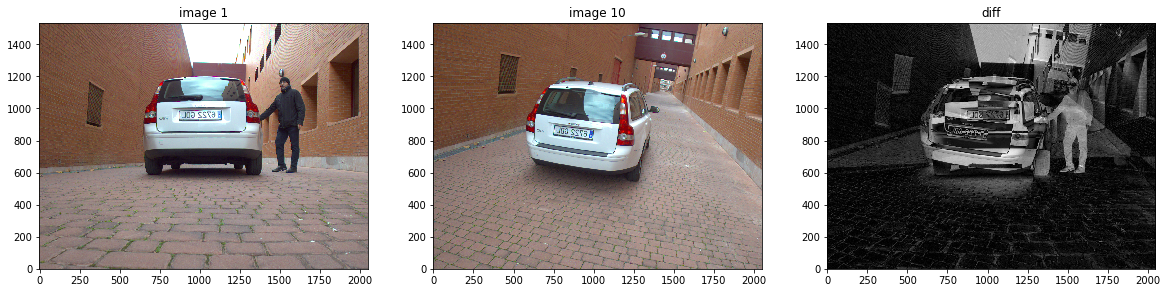

In [5]:
#plot image and difference for index 1 and 10
ik = preprocess_image(image['data'][0],image['data'][10], np.max,(1,1))
plt.figure(figsize = [20,8])
plt.subplot(1,3,1).title.set_text('image 1')
plt.imshow(cv2.cvtColor(np.uint8(extract_image(image['data'][0])),cv2.COLOR_BayerBG2RGB),origin='lower')

plt.subplot(1,3,2).title.set_text('image 10')
plt.imshow(cv2.cvtColor(np.uint8(extract_image(image['data'][10])),cv2.COLOR_BayerBG2RGB),origin='lower')

plt.subplot(1,3,3).title.set_text('diff')
plt.imshow(ik, origin='lower', cmap = plt.cm.gray)

In [55]:
framea = 2
frameb = 1
fig = plt.figure(figsize=(8, 12))
ax1 = plt.subplot(2,1,2)
x = np.uint8(255*np.ones(np.shape(preprocess_image(image['data'][3], image['data'][4], np.max, (20,20)))))
x[0] = 0
im = plt.imshow(x, origin='lower',cmap = plt.cm.gray)
ax2 = plt.subplot(2,2,2)
imo = plt.imshow(cv2.cvtColor(np.uint8(extract_image(image['data'][0])),
                              cv2.COLOR_BayerBG2RGB), origin='lower')
ax3 = plt.subplot(2,2,1)
imp = plt.imshow(cv2.cvtColor(np.uint8(extract_image(image['data'][1])),
                              cv2.COLOR_BayerBG2RGB), origin='lower')

ani = animation.FuncAnimation(fig, updateim, interval=1)
anio = animation.FuncAnimation(fig, update, interval=1)
plt.show()

In [38]:
plt.imshow(ik,origin = 'lower',cmap = plt.cm.gray)

In [46]:
plt.imshow(np.uint8(255*np.ones(np.shape(x))),cmap = plt.cm.gray)